In [66]:
import numpy as np


In [67]:
#2.1 Creating the initial board
N = 50
Lattice = np.random.randint(0,2,[N,N])          # Using randint approach
Lattice[Lattice == 0] = -1                          # Converting '0' into '-1'

print(Lattice)

[[-1  1 -1 ... -1  1 -1]
 [-1 -1 -1 ... -1  1 -1]
 [-1 -1 -1 ...  1  1  1]
 ...
 [-1  1  1 ...  1  1  1]
 [ 1 -1 -1 ... -1  1 -1]
 [ 1 -1 -1 ... -1 -1 -1]]


In [68]:
def neighbor(board,i,j,size):
    fset = [(-1,0),(1,0),(0,-1),(0,1)]
    list1 = []
    
    for (dx,dy) in fset:
        # Y = I
        k = i + dy
        # X = J
        l = j + dx
        #print(k,l)
        if (k,l) != (i,j) and 0 <= k <= size-1 and  0 <= l <= size-1:
            list1.append( board[k][l])

    return sum(list1)

In [69]:
from numpy import exp
T = 1
beta = 1/T
J = 1
E = 0
Maglist = []
timestep = []
t_current = 0



def Ising(Lattice, T, beta, J, E, t_current, steps, seed):
#random flip
    np.random.seed(seed)
    for i in range(steps):

        X = np.random.randint(0,50)
        Y = np.random.randint(0,50)
        Lattice[Y][X] = Lattice[Y][X] * -1


        #Metropolis
        delta_E = -2*J*Lattice[Y][X]*neighbor(Lattice,Y,X,N)
        #probability = [1,np.exp(-beta*delta_E)]
        #coin = np.random.rand(0,1)

        if delta_E <= 0: 
            E += delta_E
        elif delta_E > 0:
            r = np.random.rand(0,1)
            if r <= np.exp(-beta*delta_E ): 
                E += delta_E
            else:
                Lattice[Y][X] = Lattice[Y][X] * -1
        else:
            Lattice[Y][X] = Lattice[Y][X] * -1

        Maglist.append(Lattice.sum())
        timestep.append(t_current)
        t_current = t_current + 1

    #Magnetization = Lattice.sum()
    

    return Lattice #, Magnetization



C:\Users\PC\AppData\Local\Temp\ipykernel_14400\1761470069.py:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if r <= np.exp(-beta*delta_E ):
C:\Users\PC\AppData\Local\Temp\ipykernel_14400\1938545040.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(2,1)


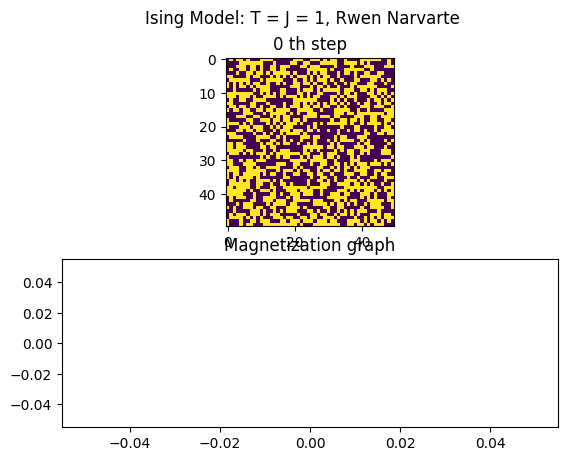

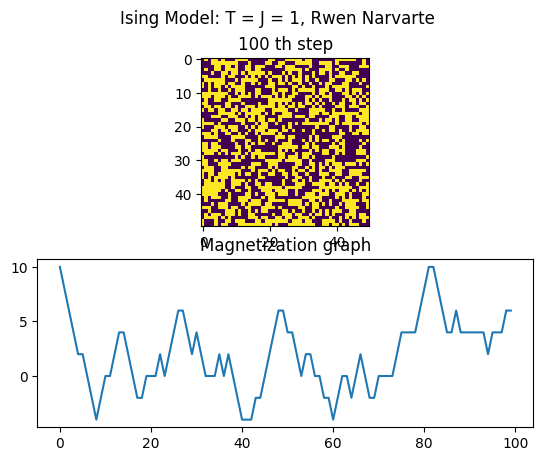

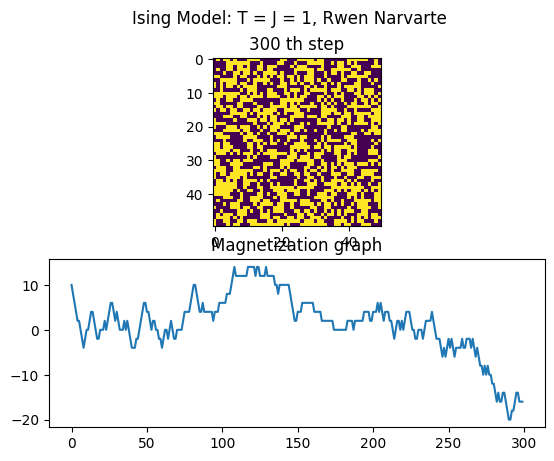

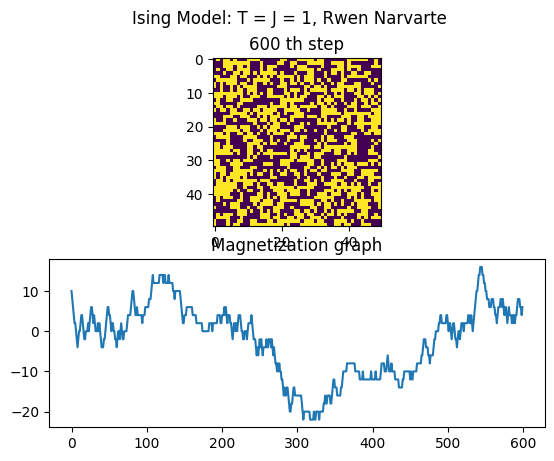

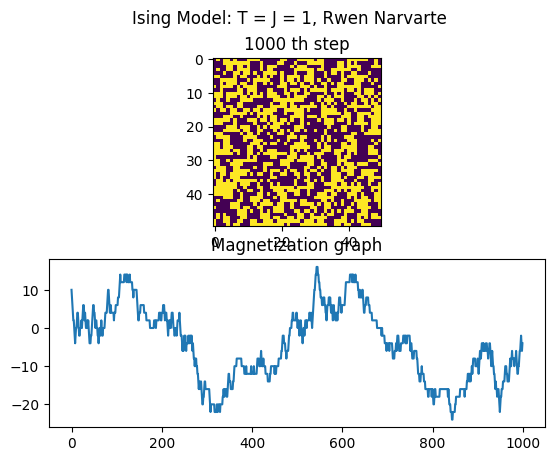

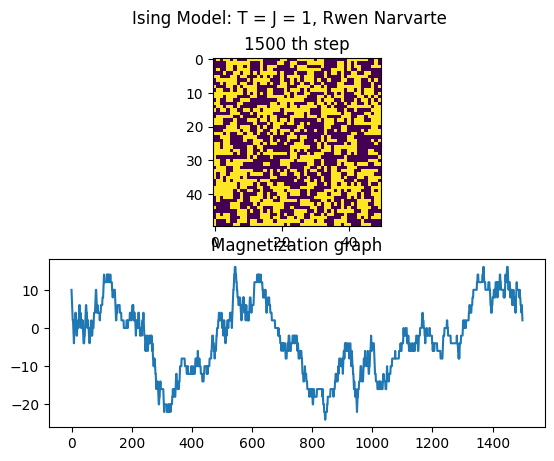

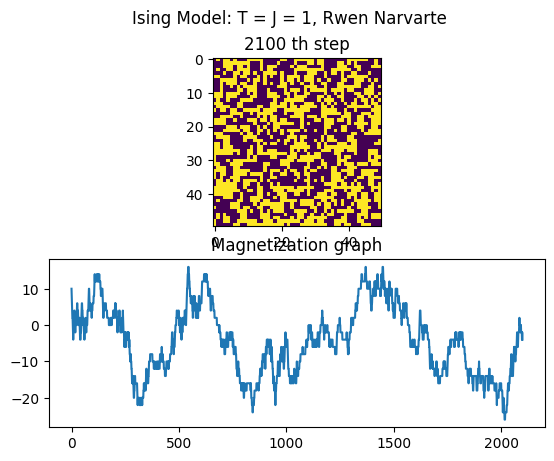

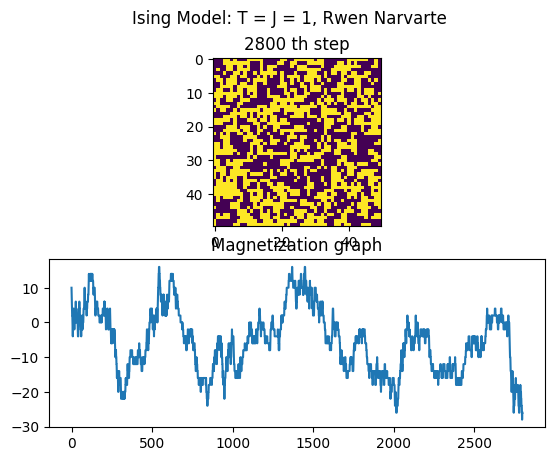

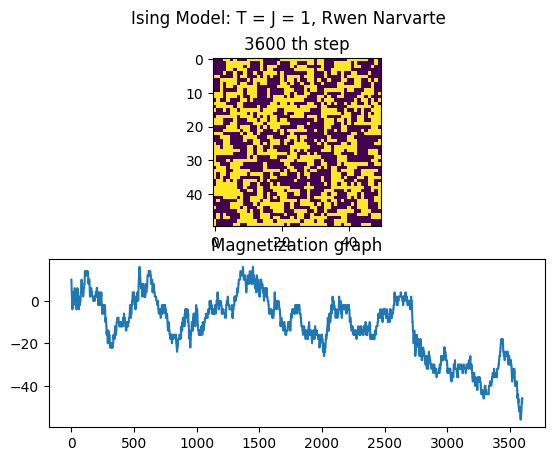

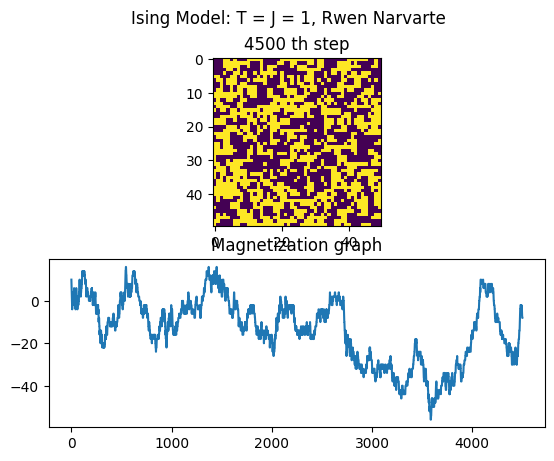

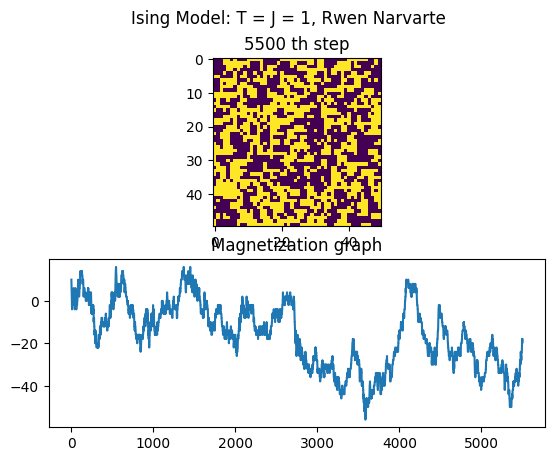

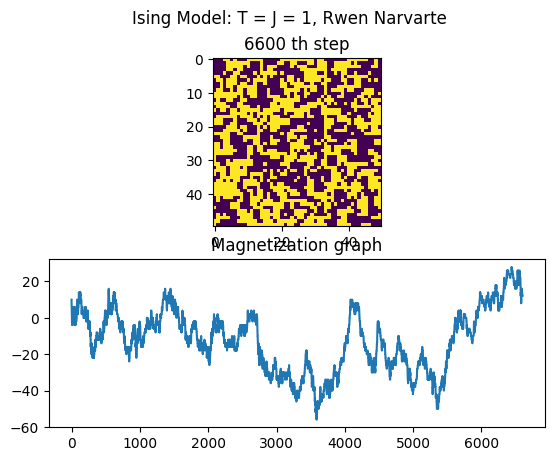

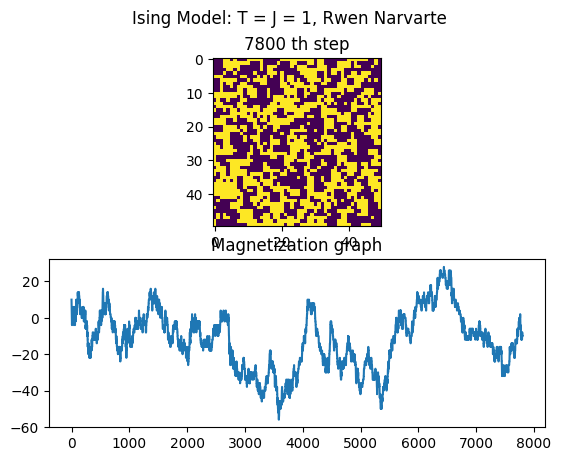

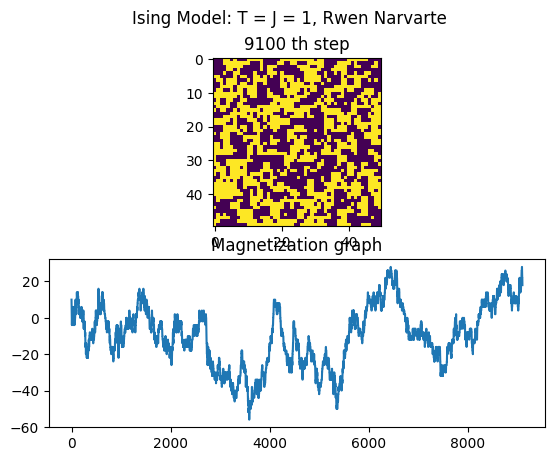

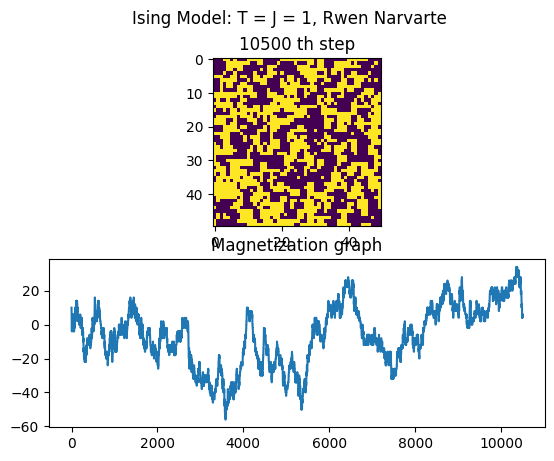

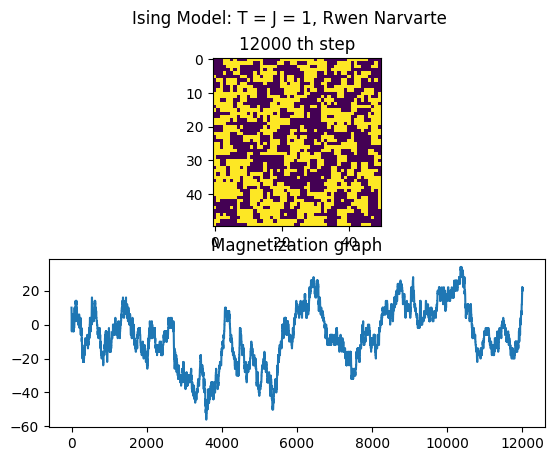

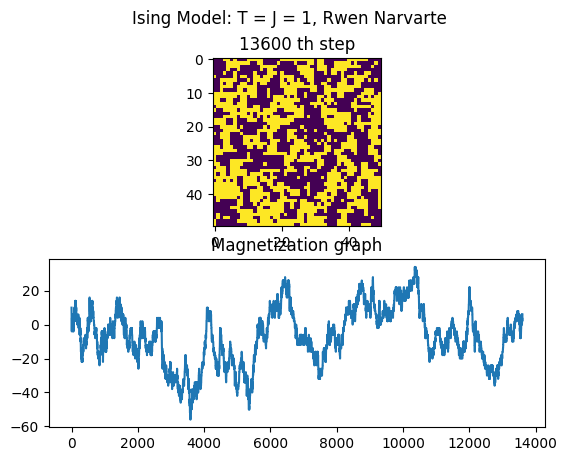

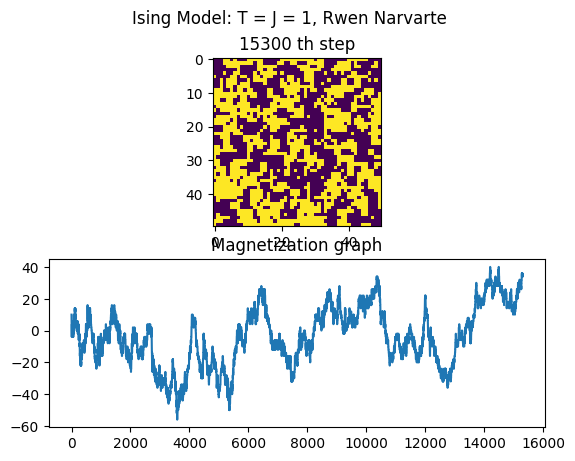

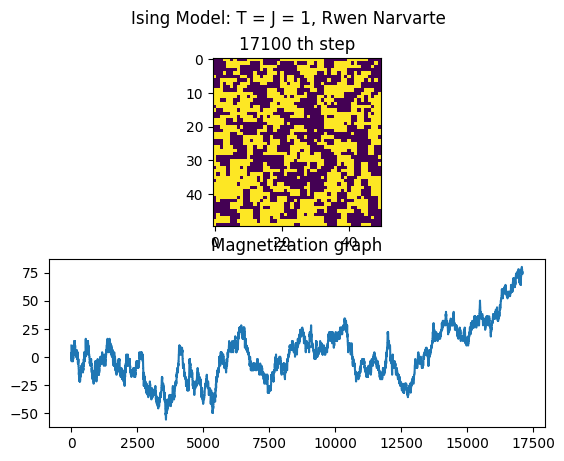

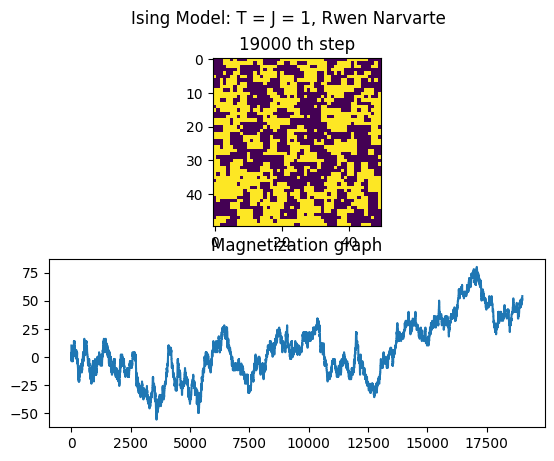

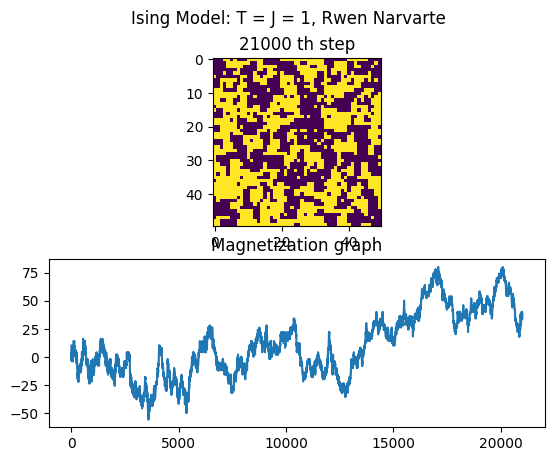

In [70]:
from matplotlib import pyplot as plt
iprev = 0

for i in range(0,21):
    fig, (ax1, ax2) = plt.subplots(2,1)
    fig.suptitle('Ising Model: T = J = 1, Rwen Narvarte')

    ax1.imshow(Ising(Lattice, T, beta, J, E, iprev, i*100, 25), interpolation = 'nearest')
    ax1.set_title(f'{i*100+iprev} th step')
    #ax2.set_ylim(-300,300)
    #ax2.set_xlim(0,100000)
    ax2.plot(timestep,Maglist)
    ax2.set_title('Magnetization graph')

    fig.savefig(f'{i}.png')
    iprev = i*100 + iprev







from matplotlib import pyplot as plt
iprev = 0

for i in range(0,21):
    fig, (ax1, ax2) = plt.subplots(2,1)
    fig.suptitle('Ising Model: T = J = 1, Rwen Narvarte')

    ax1.imshow(Ising(Lattice, T, beta, J, E, iprev, i*2500, 25), interpolation = 'nearest')
    ax1.set_title(f'{i*2500+iprev} th step')
    #ax2.set_ylim(-300,300)
    #ax2.set_xlim(0,100000)
    ax2.plot(timestep,Maglist)
    ax2.set_title('Magnetization graph')

    fig.savefig(f'{i}.png')
    iprev = i*2500 + iprev







C:\Users\PC\AppData\Local\Temp\ipykernel_14400\1761470069.py:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if r <= np.exp(-beta*delta_E ):
C:\Users\PC\AppData\Local\Temp\ipykernel_14400\1550143276.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(2,1)


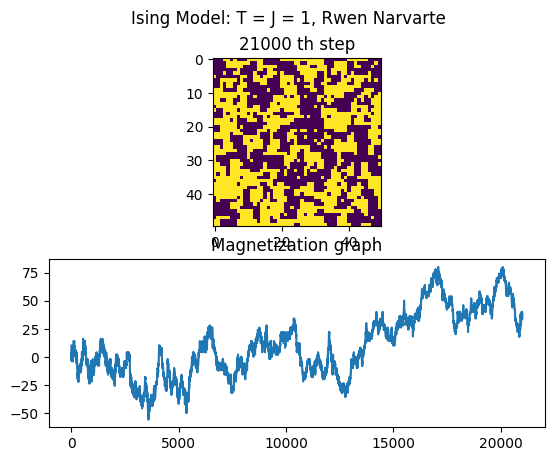

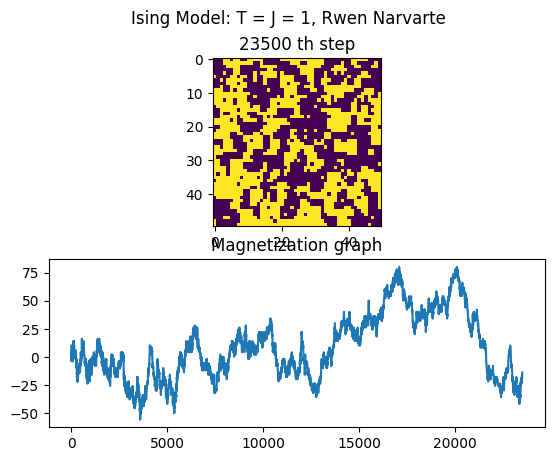

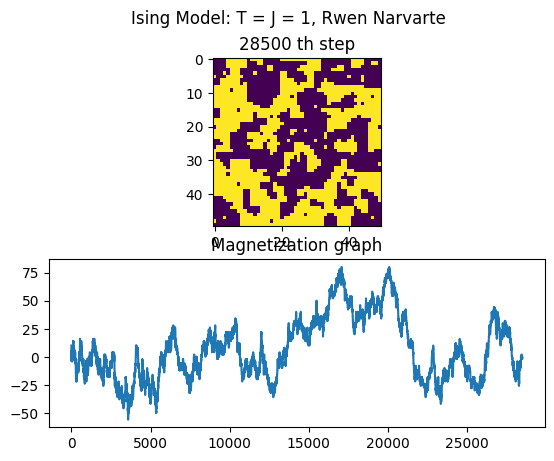

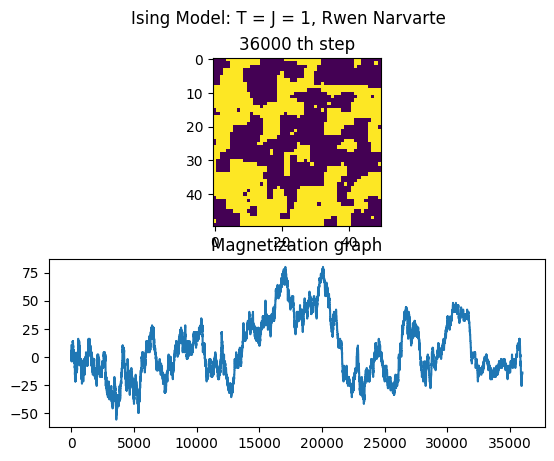

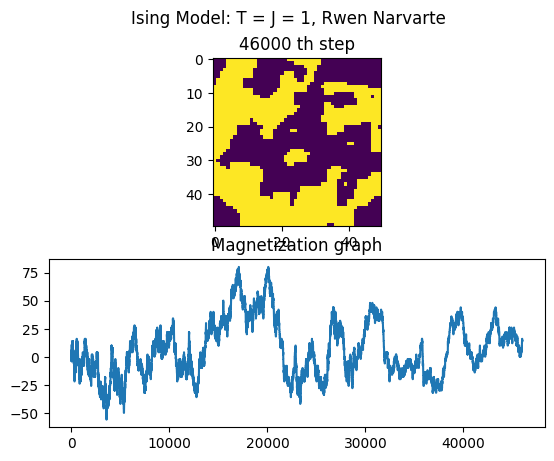

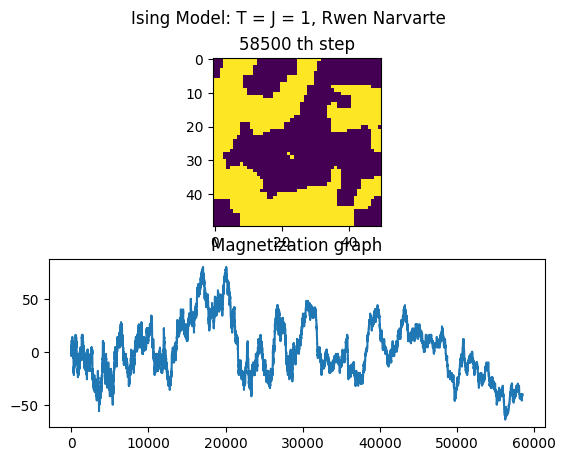

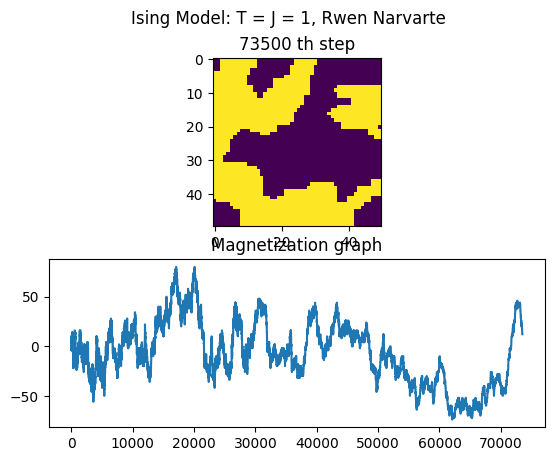

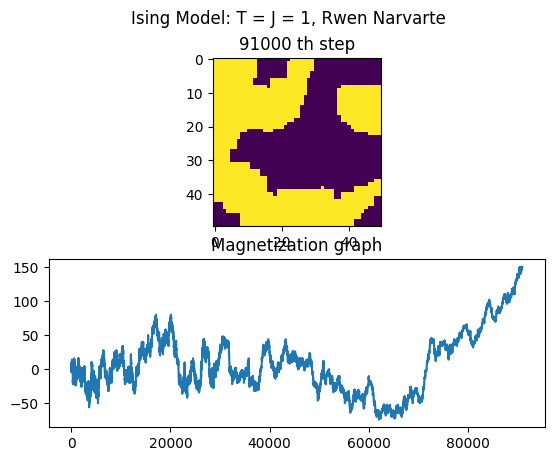

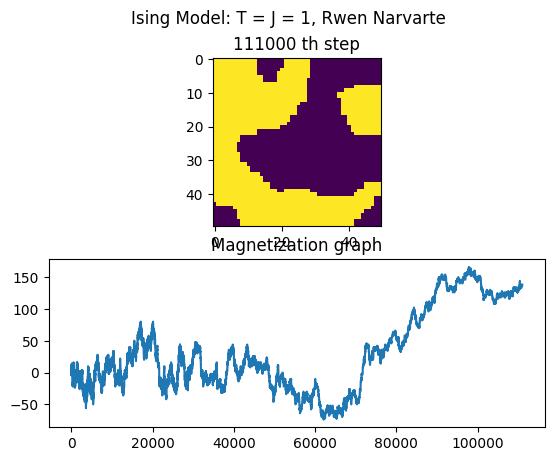

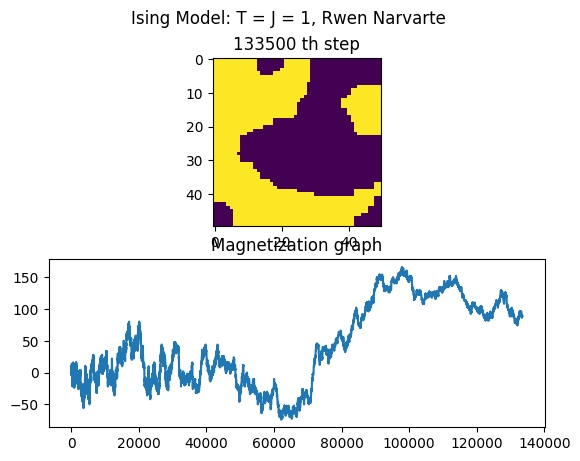

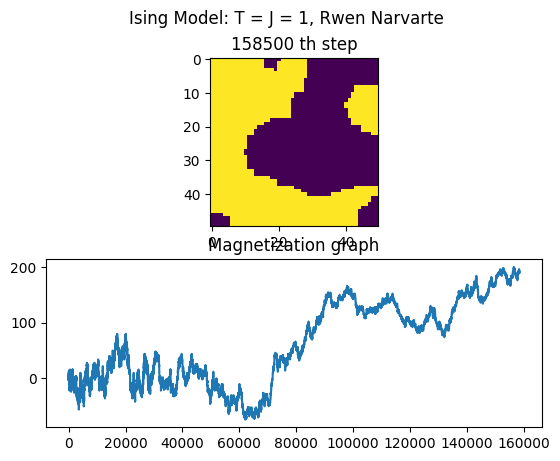

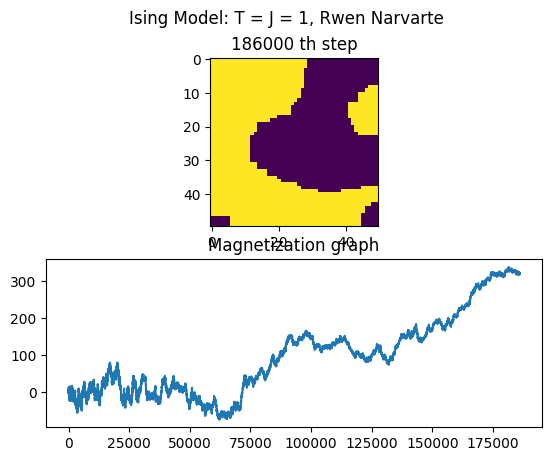

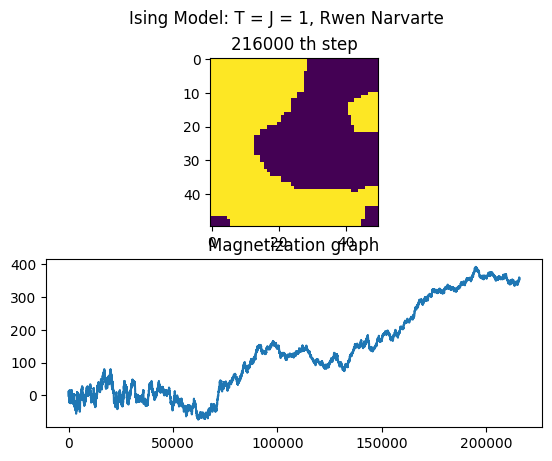

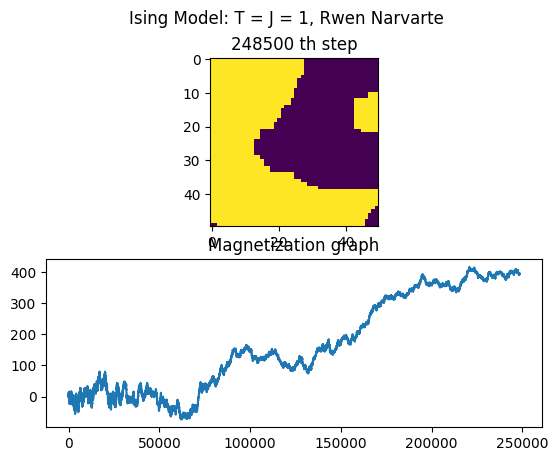

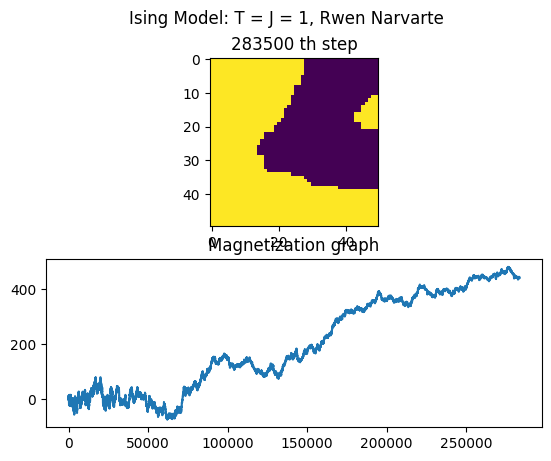

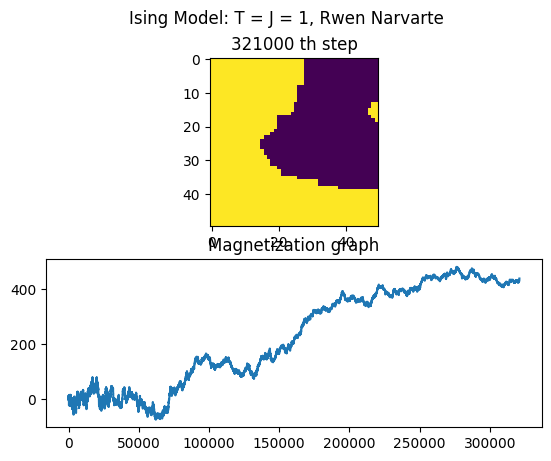

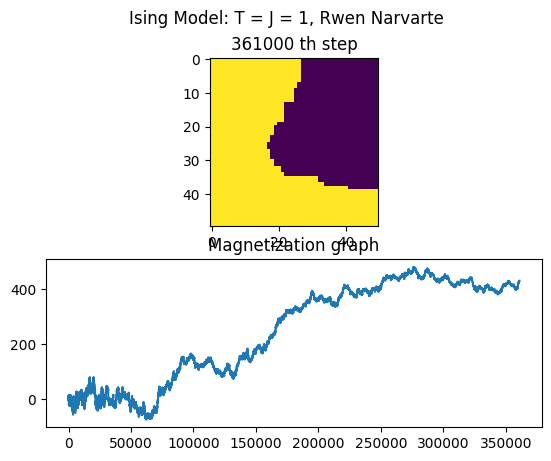

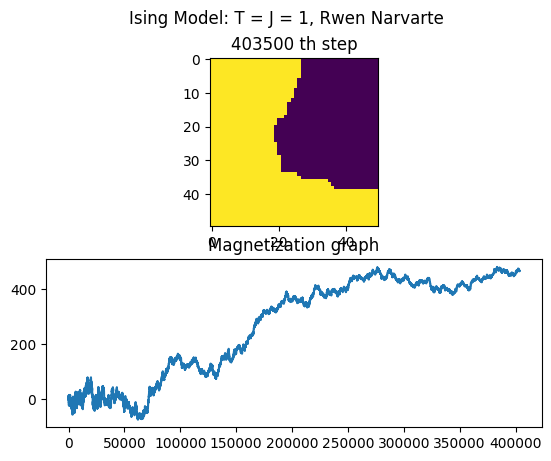

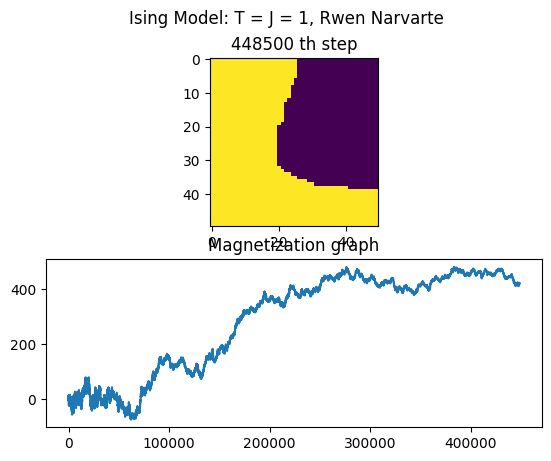

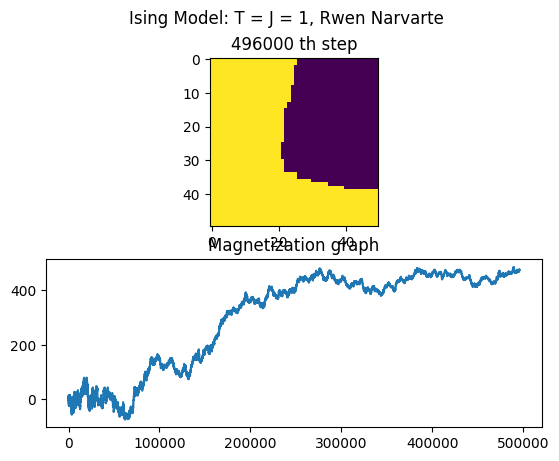

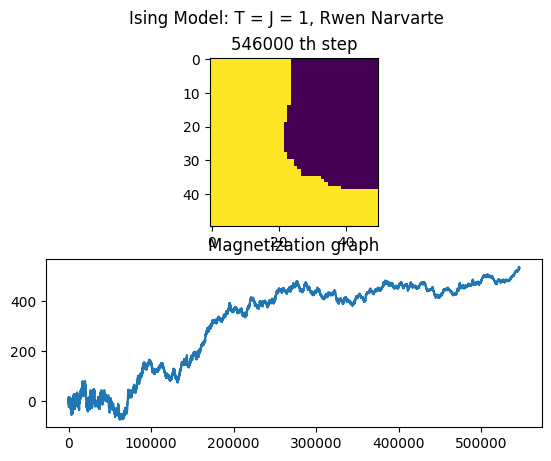

In [71]:
for i in range(0,21):
    fig, (ax1, ax2) = plt.subplots(2,1)
    fig.suptitle('Ising Model: T = J = 1, Rwen Narvarte')

    ax1.imshow(Ising(Lattice, T, beta, J, E, iprev, i*2500, 25), interpolation = 'nearest')
    ax1.set_title(f'{i*2500+iprev} th step')
    #ax2.set_ylim(-300,300)
    #ax2.set_xlim(0,100000)
    ax2.plot(timestep,Maglist)
    ax2.set_title('Magnetization graph')

    fig.savefig(f'{i+21}.png')
    iprev = i*2500 + iprev





